First 5 rows of data:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
Missing values in the dataset:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR        

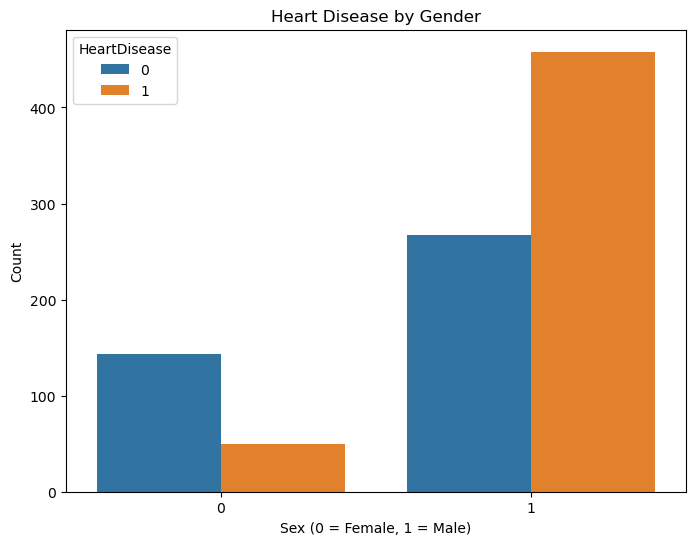

Random Forest Accuracy: 0.8804347826086957
Confusion Matrix:
 [[66 11]
 [11 96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

Epoch 1/50
46/46 [==============================] - 1s 5ms/step - loss: 0.6066 - accuracy: 0.7534 - val_loss: 0.5308 - val_accuracy: 0.8315
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.4608 - accuracy: 0.8515 - val_loss: 0.4432 - val_accuracy: 0.8424
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.3870 - accuracy: 0.8597 - val_loss: 0.4050 - val_accuracy: 0.8478
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.3576 - accuracy: 0.8665 - val_loss: 0.3839 - val_accuracy: 0.8587
Epoch 5/

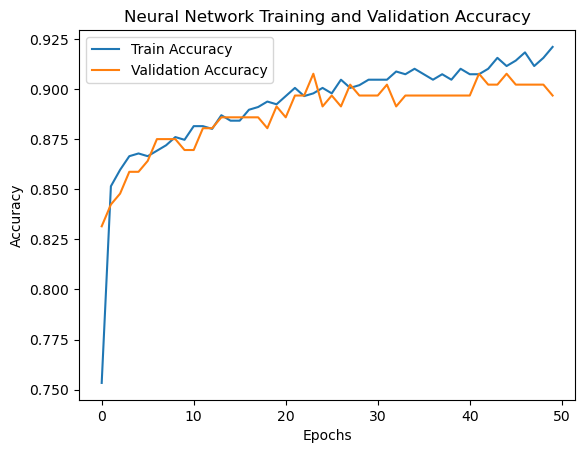

In [1]:
#!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
file_path = 'heart.csv' 
data = pd.read_csv(file_path)

# 1. Data Preprocessing
print("First 5 rows of data:")
print(data.head())

# Check for missing values
print("Missing values in the dataset:\n", data.isnull().sum())

# Encode categorical features
label_enc = LabelEncoder()
data['Sex'] = label_enc.fit_transform(data['Sex'])  # M = 1, F = 0
data['ChestPainType'] = label_enc.fit_transform(data['ChestPainType'])
data['RestingECG'] = label_enc.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = label_enc.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = label_enc.fit_transform(data['ST_Slope'])

# Features and target variable
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. Exploratory Data Analysis (EDA)
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='HeartDisease', data=data)
plt.title("Heart Disease by Gender")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()

# 3. Machine Learning: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# 4. Deep Learning: Neural Network
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Neural Network Test Accuracy: {accuracy:.2f}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Neural Network Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [4]:
# Function to preprocess input data and predict heart failure
def predict_heart_failure(input_data):
    try:
        # Convert input data into a DataFrame
        input_df = pd.DataFrame([input_data], columns=X.columns)

        # Apply label encoding to categorical features with error handling for unseen labels
        for column in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
            label_value = input_df[column].iloc[0]
            if label_value in label_enc.classes_:
                input_df[column] = label_enc.transform([label_value])[0]
            else:
                print(f"Warning: '{label_value}' in column '{column}' is an unseen label. Assigning default encoding.")
                input_df[column] = -1  # Assigning a default value for unseen labels (adjust as needed)

        # Standardize the input data
        input_scaled = scaler.transform(input_df)

        # Make predictions using Random Forest
        rf_prediction = rf_model.predict(input_scaled)[0]
        
        # Make predictions using Neural Network
        nn_prediction = model.predict(input_scaled)[0][0]
        
        # Interpret predictions
        print("\n--- Heart Failure Prediction ---")
        print("Random Forest Prediction:", "Heart Failure" if rf_prediction == 1 else "No Heart Failure")
        print("Neural Network Prediction:", "Heart Failure" if nn_prediction > 0.5 else "No Heart Failure")
        print("--------------------------------\n")
    
    except Exception as e:
        print(f"An error occurred: {e}")

# Input data for prediction
new_input = {
    'Age': 65,
    'Sex': 'M',  # Male
    'ChestPainType': 'ATA',  # Asymptomatic
    'RestingBP': 130,
    'Cholesterol': 250,
    'FastingBS': 0,
    'RestingECG': 'Normal',
    'MaxHR': 160,
    'ExerciseAngina': 'N',  # No
    'Oldpeak': 1.5,
    'ST_Slope': 'Flat'
}

# Call the prediction function
predict_heart_failure(new_input)


1/1 [==============================] - 0s 79ms/step

--- Heart Failure Prediction ---
Random Forest Prediction: Heart Failure
Neural Network Prediction: No Heart Failure
--------------------------------



In [5]:
# Input data for prediction
new_input = {
    'Age': 65,
    'Sex': 'F',  # Male
    'ChestPainType': 'ATA',  # Asymptomatic
    'RestingBP': 130,
    'Cholesterol': 250,
    'FastingBS': 0,
    'RestingECG': 'Normal',
    'MaxHR': 160,
    'ExerciseAngina': 'N',  # No
    'Oldpeak': 1.5,
    'ST_Slope': 'Flat'
}

# Call the prediction function
predict_heart_failure(new_input)

1/1 [==============================] - 0s 20ms/step

--- Heart Failure Prediction ---
Random Forest Prediction: Heart Failure
Neural Network Prediction: No Heart Failure
--------------------------------

